In [1]:
import warnings
warnings.filterwarnings('ignore') 

import fiona
import geopandas as gpd

# Install googletrans==3.1.0a0
from googletrans import Translator
from IPython.display import Image

In [2]:
# enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['kml'] = 'rw'
fiona.drvsupport.supported_drivers['KML'] = 'rw'
fiona.drvsupport.supported_drivers['libkml'] = 'rw'
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'

In [3]:
# Function to translate the values of a GeoPandas series from vi to en
def vi_to_en(r):
    dest_lang = 'en'
    lang = translator.detect(r).lang
    if lang == 'vi':
        translated = translator.translate(r, dest=dest_lang).text
        return translated
    else:
        return r

In [4]:
# read the KML file
# data from https://data.laos.opendevelopmentmekong.net/en/dataset/national-protected-areas-in-vietnam/resource/9500051b-f3ff-436f-ace4-0623d9d896fa
geodf = gpd.read_file(r"..\Data\khu-bao-ton-quoc-gia.kml")

In [5]:
geodf.head(2)

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,...,Kieu_BT,Vitri,Trang_Thai,Nam_Dexuat,Tham_Dinh,Cap_BT,So_huu,Quan_Ly,Status_1,geometry
0,None,None,None,None,None,clampToGround,-1,0,-1,None,...,Vườn quốc gia,Nằm trên đất liền,Đã được chỉ rõ,1962,Chính phủ đã thẩm định,Quốc gia,Chính phủ,Tổng cục lâm nghiệp,1,"MULTIPOLYGON (((105.73603 20.24541, 105.73574 ..."
1,None,None,None,None,None,clampToGround,-1,0,-1,None,...,Khu bảo tồn thiên nhiên,Nằm trên đất liền,Đã được chỉ rõ,2006,Chính phủ đã thẩm định,Quốc gia,Không biết,Ủy ban nhân dân tỉnh Yên Bái,1,"MULTIPOLYGON (((104.64138 21.74366, 104.64013 ..."


In [6]:
# Create a translator
translator = Translator()

In [7]:
# Translate the first 10 rows...
for i, row in geodf.head(10).iterrows():
    
    # Translation is very slow...
    t_row = row.apply(vi_to_en)
    
    # Substitute the row with the translated one
    geodf.loc[i] = t_row

In [8]:
# Show the last original row (in vietnamese)...
row

Name                                                         None
description                                                  None
timestamp                                                    None
begin                                                        None
end                                                          None
altitudeMode                                        clampToGround
tessellate                                                     -1
extrude                                                         0
visibility                                                     -1
drawOrder                                                    None
icon                                                         None
IUCN_CAT                                               Không biết
Ten                                                        Hòn Mê
Kieu_BT                                      Khu bảo vệ cảnh quan
Vitri                                             Nằm dọc bờ biển
Trang_Thai

In [9]:
# Show the last translated row (in english)...
t_row

Name                                                         None
description                                                  None
timestamp                                                    None
begin                                                        None
end                                                          None
altitudeMode                                        clampToGround
tessellate                                                     -1
extrude                                                         0
visibility                                                     -1
drawOrder                                                    None
icon                                                         None
IUCN_CAT                                               don't know
Ten                                                        Hon Me
Kieu_BT                                 Landscape protection area
Vitri                                       Lying along the beach
Trang_Thai

In [10]:
# Save the first 10 rows as geopackage... or what you want
geodf_10 = geodf.head(10)
geodf_10.to_file("khu-bao-ton-quoc-gia.gpkg", 
                 layer='National protected areas', 
                 driver="GPKG")

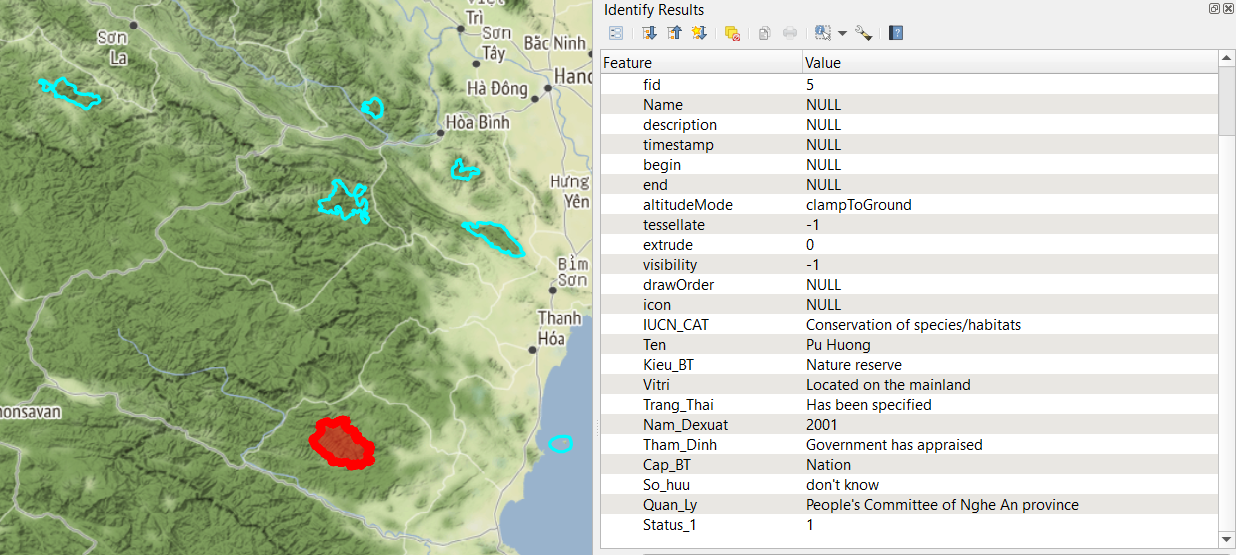

In [11]:
# The results in QGIS
Image(filename='Immagine 2022-06-20 153216.png')